In [1]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
# import PyDynamic as pd

#### Функции

In [2]:
# Диаграмма нулей и полюсов
def ZerosPolesDiagram(z, p):
    fg, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle(xy=(0,0),radius=1, edgecolor='gray', facecolor='white', linestyle='--')
    ax.add_patch(circle)
    ax.scatter(z.real, z.imag, marker='o', facecolor='white', edgecolor='C0', s=100)
    ax.scatter(p.real, p.imag, marker='x', s=100)
    ax.axhline(y=0, color="black", linestyle="-")
    ax.axvline(x=0, color="black", linestyle="-")
    ax.grid()
    plt.show()

# Расчет АЧХ
def FrequencyResponse(h):
    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        return 20 * np.log10(abs(h))

# Расчет ФЧХ
def PhaseResponse(h):
    return np.unwrap(np.angle(h))

# Графики АЧХ и ФЧХ
def FRPRDiagram(w, fr, pr, logx = False, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    if (logx):
        ax[0].semilogx(w, fr, 'b')
    else:
        ax[0].plot(w, fr, 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, Гц')
    ax[0].grid(True)

    if (logx):
        ax[1].semilogx(w, pr, 'g')
    else:
        ax[1].plot(w, pr, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, Гц')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)
    
    plt.show()

# Оболочка для отрисовки графика при вызове функций freqs и freqz в линейном масштабе
def FRPRDiag (w, h):
    FRPRDiagram(w, FrequencyResponse(h), PhaseResponse(h), logx=False)

# Оболочка для отрисовки графика при вызове функций freqs и freqz в логарифмическом масштабе
def FRPRDiagLog (w, h):
    FRPRDiagram(w, FrequencyResponse(h), PhaseResponse(h), logx=True)


#### Синтез фильтра нижних частот Чебышева 2

Порядок фильтра: 4
Частота: 9223.251005507911


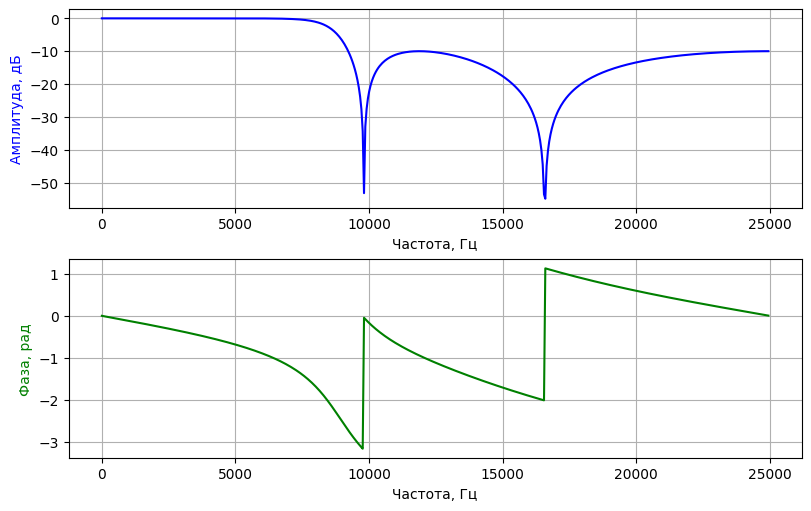

In [3]:
# Расчет порядка цифрового фильтра Чебышева 2
# Возвращаемые значения:
# ord - наименьший порядок фильтра, соответствующий заданным параметрам
# wn - натуральная частота Чебышева
# Параметры:
# wp - частота среза
# ws - частота задержания
# gpass - максимально-допустимые потери в полосе пропускания
# gstop - минимальное затухание в полосе подавления
# analog - задает расчет для аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# fs - частота дискретизации цифрового фильтра

ord, wn = sp.cheb2ord(wp=5000, ws=10000, gpass=3, gstop=40, fs=50000)
print(f'Порядок фильтра: {ord}\nЧастота: {wn}')

# Синтез фильтра Чебышева 2
# Возвращаемые значения:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# Параметры:
# N - порядок фильтра
# rs - допустимый уровень пульсаций в полосе подавления
# btype - тип фильтра:
#    'lowpass' - фильтр нижних частот
#    'highpass' - фильтр верхних частот
#    'bandpass' - полосовой фильтр
#    'bandstop' - режекторный фильтр
# analog - задает синтез аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# output - тип возвращаемых значений:
#    'ba' - коэффициенты прямых и обратных связей
#    'zpk' - значения нулей, полюсов и коэффициент усиления
#    'sos' - массив коэффициентов секций второго порядка
# fs - частота дискретизации цифрового фильтра
[b, a] = sp.cheby2(N=ord, rs=10, Wn=wn, btype="lowpass", analog=False, output='ba', fs=50000)

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# fs - частота дискретизации
# plot - функция отрисовки графиков
w, h = sp.freqz(b=b, a=a, fs=50000, plot=FRPRDiag)

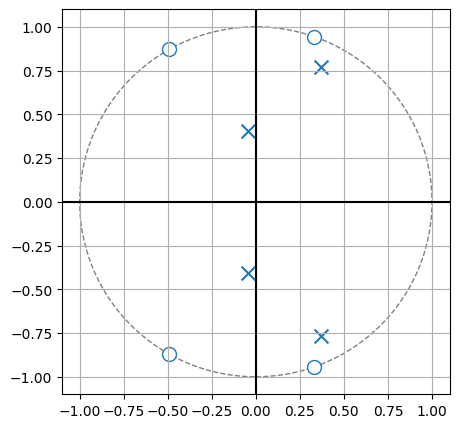

In [4]:
# Преобразование фильтра, представленного в виде коэффициентов прямых и обратных связей
# в форму значений нулей, полюсов и коэффициента усиления
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

ZerosPolesDiagram(z=z, p=p)

Результаты расчета: 
0.3104 0.3018 0.359 0.1017 0.0594 -0.0608 -0.1267 -0.0413 0.0672 0.0782 0.0084 -0.0504 -0.0435 0.0043 0.0349 0.0228 -0.0085 -0.0229 -0.0109 0.0086 0.0143 0.0044 -0.0072 -0.0085 -0.0011 0.0054 0.0048 -0.0004 -0.0038 -0.0026


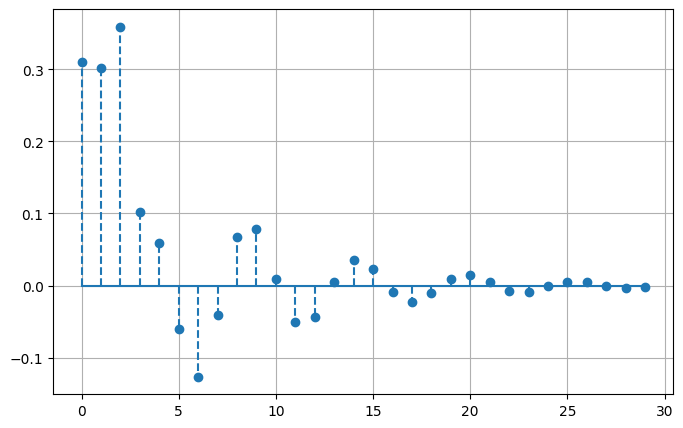

In [5]:
# Импульсная характеристика фильтра
# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# system - описание фильтра, состоящее из следующих аргументов:
#   b - коэффициенты прямых связей
#   a - коэффициенты обратных связей
#   dt - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
dt = 1
t, y = sp.dimpulse(system=(b,a,dt), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

Результаты расчета: 
0.5776 0.2426 0.5548 0.8434 0.8876 0.9232 1.0699 1.1786 1.1534 1.0912 1.0735 1.0468 0.9705 0.916 0.9413 0.9851 0.9702 0.929 0.9432 1.0107 1.0583 1.0564 1.0448 1.0486 1.0409 1.0006 0.956 0.9423 0.9542 0.9667


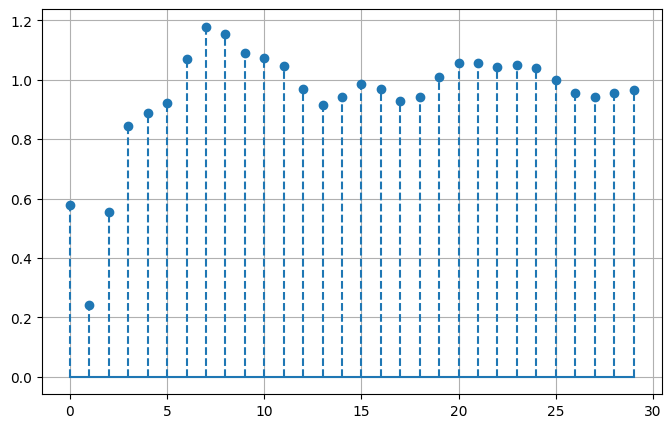

In [18]:
# Переходная характеристика фильтра
# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# system - описание фильтра, состоящее из следующих аргументов:
#   b - коэффициенты прямых связей
#   a - коэффициенты обратных связей
#   dt - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
dt = 1
t, y = sp.dstep(system=(b,a,dt), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Синтез фильтра верхних частот Чебышева 2

Порядок фильтра: 4
Частота: 5509.53132430108


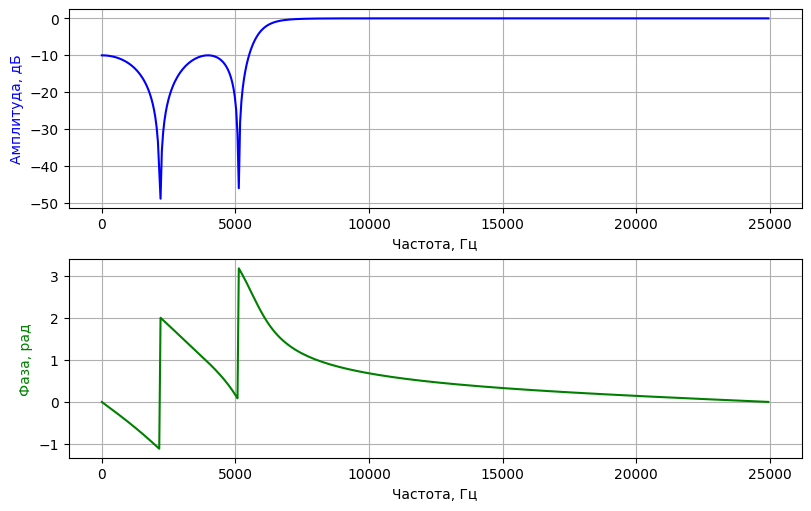

In [6]:
# Расчет порядка цифрового фильтра Чебышева 2
# Возвращаемые значения:
# ord - наименьший порядок фильтра, соответствующий заданным параметрам
# wn - натуральная частота Чебышева
# Параметры:
# wp - частота среза
# ws - частота задержания
# gpass - максимально-допустимые потери в полосе пропускания
# gstop - минимальное затухание в полосе подавления
# analog - задает расчет для аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# fs - частота дискретизации цифрового фильтра

ord, wn = sp.cheb2ord(wp=10000, ws=5000, gpass=3, gstop=40, fs=50000)
print(f'Порядок фильтра: {ord}\nЧастота: {wn}')

# Синтез фильтра Чебышева 2
# Возвращаемые значения:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# Параметры:
# N - порядок фильтра
# rs - допустимый уровень пульсаций в полосе подавления
# btype - тип фильтра:
#    'lowpass' - фильтр нижних частот
#    'highpass' - фильтр верхних частот
#    'bandpass' - полосовой фильтр
#    'bandstop' - режекторный фильтр
# analog - задает синтез аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# output - тип возвращаемых значений:
#    'ba' - коэффициенты прямых и обратных связей
#    'zpk' - значения нулей, полюсов и коэффициент усиления
#    'sos' - массив коэффициентов секций второго порядка
# fs - частота дискретизации цифрового фильтра
[b, a] = sp.cheby2(N=ord, rs=10, Wn=wn, btype="highpass", analog=False, output='ba', fs=50000)

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# fs - частота дискретизации
# plot - функция отрисовки графиков
w, h = sp.freqz(b=b, a=a, fs=50000, plot=FRPRDiag)

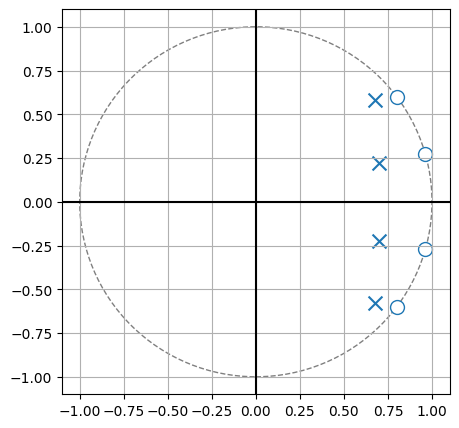

In [7]:
# Преобразование фильтра, представленного в виде коэффициентов прямых и обратных связей
# в форму значений нулей, полюсов и коэффициента усиления
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

ZerosPolesDiagram(z=z, p=p)

Результаты расчета: 
0.5776 -0.335 0.3122 0.2886 0.0442 0.0356 0.1467 0.1087 -0.0252 -0.0622 -0.0178 -0.0267 -0.0763 -0.0545 0.0253 0.0439 -0.0149 -0.0412 0.0141 0.0676 0.0476 -0.0019 -0.0117 0.0039 -0.0077 -0.0402 -0.0447 -0.0137 0.012 0.0125


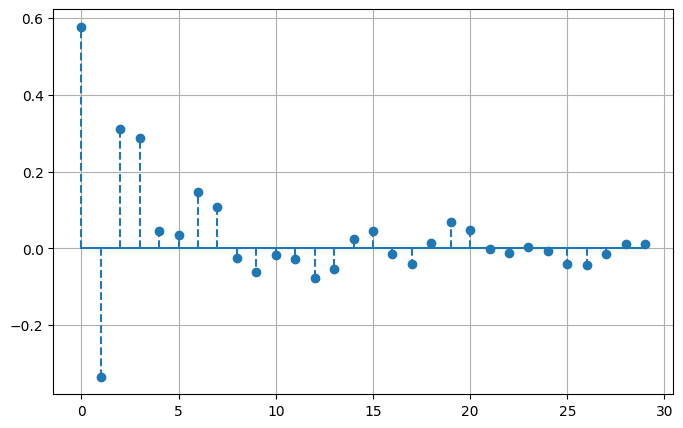

In [15]:
# Импульсная характеристика фильтра
# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# system - описание фильтра, состоящее из следующих аргументов:
#   b - коэффициенты прямых связей
#   a - коэффициенты обратных связей
#   dt - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
dt = 1
t, y = sp.dimpulse(system=(b,a,dt), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

Результаты расчета: 
0.5776 0.2426 0.5548 0.8434 0.8876 0.9232 1.0699 1.1786 1.1534 1.0912 1.0735 1.0468 0.9705 0.916 0.9413 0.9851 0.9702 0.929 0.9432 1.0107 1.0583 1.0564 1.0448 1.0486 1.0409 1.0006 0.956 0.9423 0.9542 0.9667


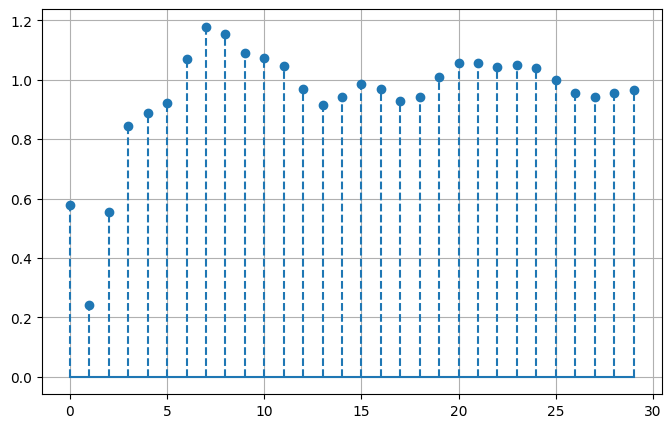

In [19]:
# Переходная характеристика фильтра
# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# system - описание фильтра, состоящее из следующих аргументов:
#   b - коэффициенты прямых связей
#   a - коэффициенты обратных связей
#   dt - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
dt = 1
t, y = sp.dstep(system=(b,a,dt), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Синтез полосового фильтра Чебышева 2

Порядок фильтра: 4
Частота: [ 3563.41243122 12786.66343673]


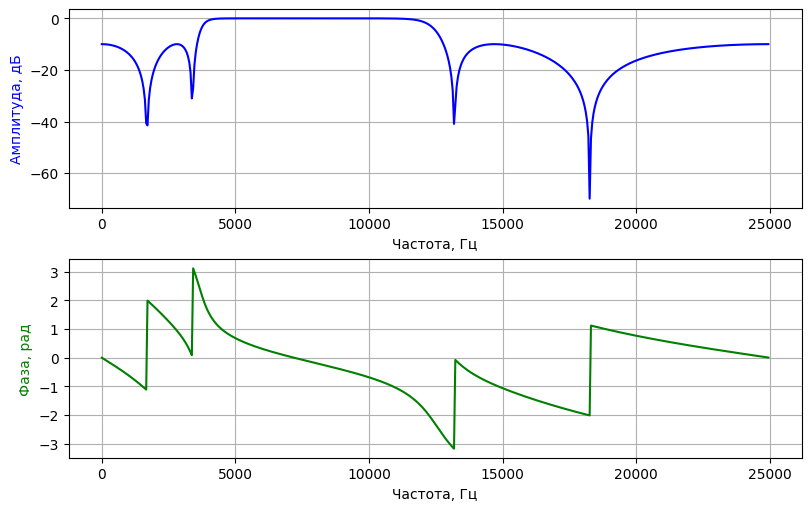

In [9]:
# Расчет порядка цифрового фильтра Чебышева 2
# Возвращаемые значения:
# ord - наименьший порядок фильтра, соответствующий заданным параметрам
# wn - натуральная частота Чебышева
# Параметры:
# wp - частота среза
# ws - частота задержания
# gpass - максимально-допустимые потери в полосе пропускания
# gstop - минимальное затухание в полосе подавления
# analog - задает расчет для аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# fs - частота дискретизации цифрового фильтра

ord, wn = sp.cheb2ord(wp=[5000, 10000], ws=[2500, 15000], gpass=3, gstop=40, fs=50000)
print(f'Порядок фильтра: {ord}\nЧастота: {wn}')

# Синтез фильтра Чебышева 2
# Возвращаемые значения:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# Параметры:
# N - порядок фильтра
# rs - допустимый уровень пульсаций в полосе подавления
# btype - тип фильтра:
#    'lowpass' - фильтр нижних частот
#    'highpass' - фильтр верхних частот
#    'bandpass' - полосовой фильтр
#    'bandstop' - режекторный фильтр
# analog - задает синтез аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# output - тип возвращаемых значений:
#    'ba' - коэффициенты прямых и обратных связей
#    'zpk' - значения нулей, полюсов и коэффициент усиления
#    'sos' - массив коэффициентов секций второго порядка
# fs - частота дискретизации цифрового фильтра
[b, a] = sp.cheby2(N=ord, rs=10, Wn=wn, btype="bandpass", analog=False, output='ba', fs=50000)

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# fs - частота дискретизации
# plot - функция отрисовки графиков
w, h = sp.freqz(b=b, a=a, fs=50000, plot=FRPRDiag)

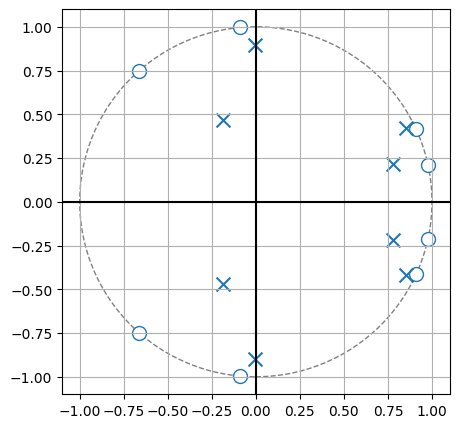

In [10]:
# Преобразование фильтра, представленного в виде коэффициентов прямых и обратных связей
# в форму значений нулей, полюсов и коэффициента усиления
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

ZerosPolesDiagram(z=z, p=p)

Результаты расчета: 
0.5776 -0.335 0.3122 0.2886 0.0442 0.0356 0.1467 0.1087 -0.0252 -0.0622 -0.0178 -0.0267 -0.0763 -0.0545 0.0253 0.0439 -0.0149 -0.0412 0.0141 0.0676 0.0476 -0.0019 -0.0117 0.0039 -0.0077 -0.0402 -0.0447 -0.0137 0.012 0.0125


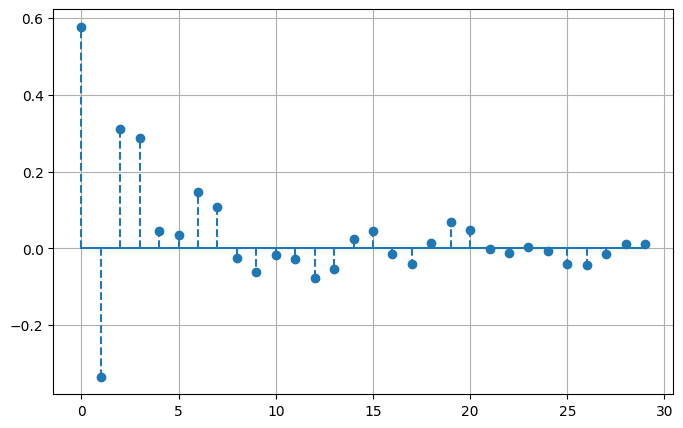

In [16]:
# Импульсная характеристика фильтра
# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# system - описание фильтра, состоящее из следующих аргументов:
#   b - коэффициенты прямых связей
#   a - коэффициенты обратных связей
#   dt - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
dt = 1
t, y = sp.dimpulse(system=(b,a,dt), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

Результаты расчета: 
0.5776 0.2426 0.5548 0.8434 0.8876 0.9232 1.0699 1.1786 1.1534 1.0912 1.0735 1.0468 0.9705 0.916 0.9413 0.9851 0.9702 0.929 0.9432 1.0107 1.0583 1.0564 1.0448 1.0486 1.0409 1.0006 0.956 0.9423 0.9542 0.9667


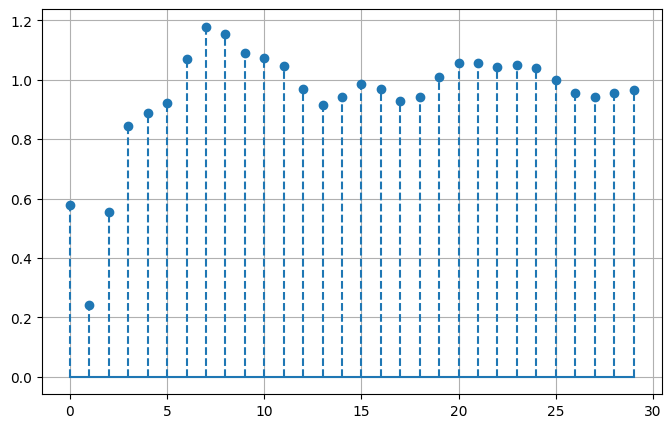

In [20]:
# Переходная характеристика фильтра
# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# system - описание фильтра, состоящее из следующих аргументов:
#   b - коэффициенты прямых связей
#   a - коэффициенты обратных связей
#   dt - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
dt = 1
t, y = sp.dstep(system=(b,a,dt), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Синтез режекторного фильтра Чебышева 2

Порядок фильтра: 4
Частота: [ 4218.71227202 11391.93484793]


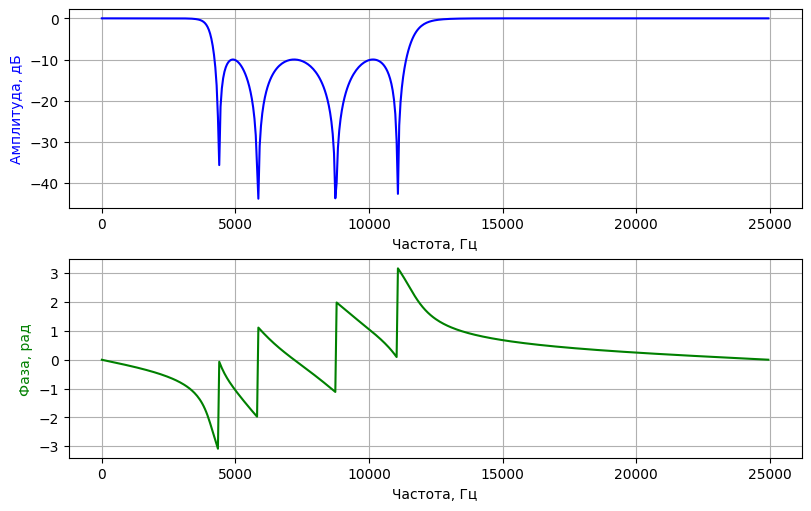

In [12]:
# Расчет порядка цифрового фильтра Чебышева 2
# Возвращаемые значения:
# ord - наименьший порядок фильтра, соответствующий заданным параметрам
# wn - натуральная частота Чебышева
# Параметры:
# wp - частота среза
# ws - частота задержания
# gpass - максимально-допустимые потери в полосе пропускания
# gstop - минимальное затухание в полосе подавления
# analog - задает расчет для аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# fs - частота дискретизации цифрового фильтра

ord, wn = sp.cheb2ord(wp=[2500, 15000], ws=[5000, 10000], gpass=3, gstop=40, fs=50000)
print(f'Порядок фильтра: {ord}\nЧастота: {wn}')

# Синтез фильтра Чебышева 2
# Возвращаемые значения:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# Параметры:
# N - порядок фильтра
# rs - допустимый уровень пульсаций в полосе подавления
# btype - тип фильтра:
#    'lowpass' - фильтр нижних частот
#    'highpass' - фильтр верхних частот
#    'bandpass' - полосовой фильтр
#    'bandstop' - режекторный фильтр
# analog - задает синтез аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# output - тип возвращаемых значений:
#    'ba' - коэффициенты прямых и обратных связей
#    'zpk' - значения нулей, полюсов и коэффициент усиления
#    'sos' - массив коэффициентов секций второго порядка
# fs - частота дискретизации цифрового фильтра
[b, a] = sp.cheby2(N=ord, rs=10, Wn=wn, btype="bandstop", analog=False, output='ba', fs=50000)

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# fs - частота дискретизации
# plot - функция отрисовки графиков
w, h = sp.freqz(b=b, a=a, fs=50000, plot=FRPRDiag)

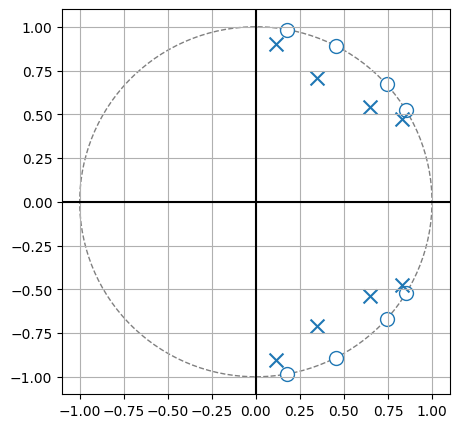

In [13]:
# Преобразование фильтра, представленного в виде коэффициентов прямых и обратных связей
# в форму значений нулей, полюсов и коэффициента усиления
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

ZerosPolesDiagram(z=z, p=p)

Результаты расчета: 
0.5776 -0.335 0.3122 0.2886 0.0442 0.0356 0.1467 0.1087 -0.0252 -0.0622 -0.0178 -0.0267 -0.0763 -0.0545 0.0253 0.0439 -0.0149 -0.0412 0.0141 0.0676 0.0476 -0.0019 -0.0117 0.0039 -0.0077 -0.0402 -0.0447 -0.0137 0.012 0.0125


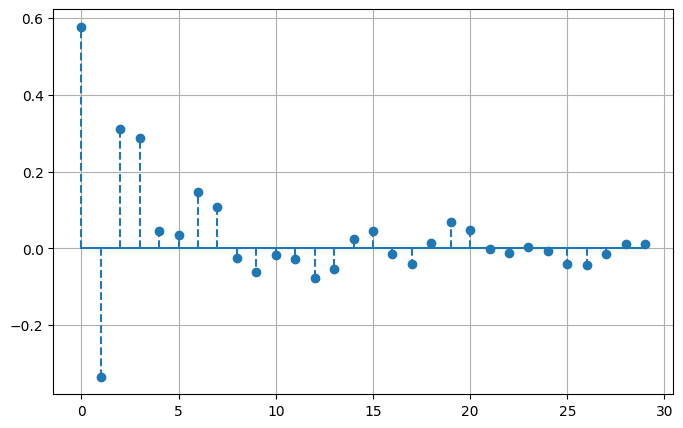

In [17]:
# Импульсная характеристика фильтра
# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# system - описание фильтра, состоящее из следующих аргументов:
#   b - коэффициенты прямых связей
#   a - коэффициенты обратных связей
#   dt - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
dt = 1
t, y = sp.dimpulse(system=(b,a,dt), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

Результаты расчета: 
0.5776 0.2426 0.5548 0.8434 0.8876 0.9232 1.0699 1.1786 1.1534 1.0912 1.0735 1.0468 0.9705 0.916 0.9413 0.9851 0.9702 0.929 0.9432 1.0107 1.0583 1.0564 1.0448 1.0486 1.0409 1.0006 0.956 0.9423 0.9542 0.9667


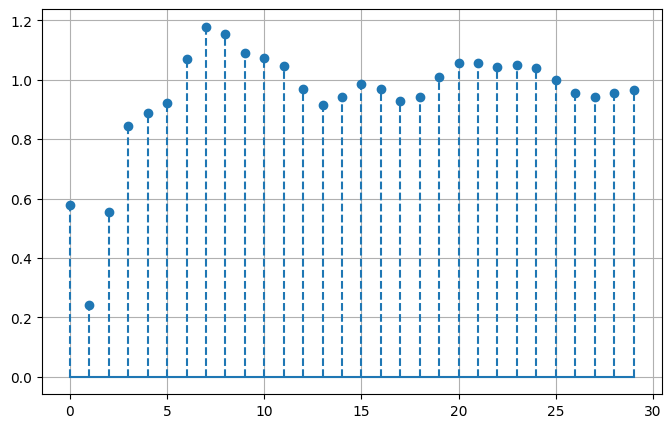

In [21]:
# Переходная характеристика фильтра
# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# system - описание фильтра, состоящее из следующих аргументов:
#   b - коэффициенты прямых связей
#   a - коэффициенты обратных связей
#   dt - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
dt = 1
t, y = sp.dstep(system=(b,a,dt), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
# # ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()